# Predicting NBA MVP Player
## Data Cleaning

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Cleaning the Data

**MVPs Dataset**

In [3]:
mvps = pd.read_csv('mvps.csv')
mvps.head()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,37.0,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,2,Magic Johnson,31,LAL,10.0,497.0,960,0.518,79,37.1,...,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,3,David Robinson,25,SAS,6.0,476.0,960,0.496,82,37.7,...,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,4,Charles Barkley,27,PHI,2.0,222.0,960,0.231,67,37.3,...,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,5,Karl Malone,27,UTA,0.0,142.0,960,0.148,82,40.3,...,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991


**Removing Irrelevant Fields**

The technical stats are not relevant for predicting MVPs as they are already baked into the general fields. We'll drop those columns.

In [4]:
rel_cols = ['Player', 'Year', 'Pts Won', 'Pts Max', 'Share']
mvps = mvps[rel_cols]
mvps.head()

,Player,Year,Pts Won,Pts Max,Share
0,Michael Jordan,1991,891.0,960,0.928
1,Magic Johnson,1991,497.0,960,0.518
2,David Robinson,1991,476.0,960,0.496
3,Charles Barkley,1991,222.0,960,0.231
4,Karl Malone,1991,142.0,960,0.148


**Player Stats Dataset**

We will clean the Player field, so we can merge this df with the mvp df on Player and Year.
* Remove '*' from names in the field.
* Combine player rows where player has multiple rows of stats

In [5]:
player_stats = pd.read_csv('player_stats.csv')
player_stats.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991


In [6]:
np.sort(player_stats['Player'].unique())

array(['A.C. Green', 'A.J. Bramlett', 'A.J. English', ..., 'Žan Tabak',
       'Žarko Čabarkapa', 'Željko Rebrača'], dtype=object)

In [7]:
player_stats['Player'] = player_stats['Player'].apply(lambda  x: x.replace('*', ''))

In [8]:
def single_row(group_df):
    if group_df.shape[0] == 1:
        return group_df
    else:
        row = group_df.loc[group_df['Tm'] == 'TOT']
        row['Tm'] = group_df.iloc[-1,:]['Tm']


player_stats = player_stats.groupby(by=['Player', 'Year']).apply(single_row)
player_stats.index = player_stats.index.droplevel(['Player', 'Year'])
player_stats.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
164,135,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,...,2.5,3.8,6.3,0.9,0.7,0.3,1.2,1.4,9.1,1991
633,141,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,...,3.7,5.6,9.3,1.4,1.1,0.4,1.4,1.7,13.6,1992
1092,137,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,...,3.5,5.2,8.7,1.4,1.1,0.5,1.4,1.8,12.8,1993
1579,149,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,...,3.4,5.8,9.2,1.7,0.9,0.5,1.2,1.7,14.7,1994
2067,142,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,...,2.4,5.8,8.2,1.5,0.7,0.4,1.4,1.8,11.2,1995


**Merge player_stats and mvps dataframes**

* We'll be using an outer merge as some records in the player_stats dataframe are not in the mvps dataframe.
* Where a player is not in the mvps dataframe, the new df will have NaN for that player's mvp field stats. We'll replace the NaN with 0.

In [9]:
combined = player_stats.merge(mvps, how='outer', on=['Player', 'Year'])
combined.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,135,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,...,0.9,0.7,0.3,1.2,1.4,9.1,1991,NaN,NaN,NaN
1,141,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,NaN,NaN,NaN
2,137,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,NaN,NaN,NaN
3,149,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,NaN,NaN,NaN
4,142,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,NaN,NaN,NaN


In [10]:
combined[['Pts Won', 'Pts Max', 'Share']] = combined[['Pts Won', 'Pts Max', 'Share']].fillna(0)
combined.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,135,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,...,0.9,0.7,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0
1,141,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0
2,137,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0
3,149,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0
4,142,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0


**Team Data Dataset**
* Remove '*' from teams names
* Remove records with 'Division' in them
* Map Team Nickname to Team Full name

In [11]:
teams = pd.read_csv('team_data.csv')
teams.head(10)

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
5,24,58,.293,32.0,101.8,107.8,-5.91,1991,Miami Heat
6,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1991,Central Division
7,61,21,.744,—,110.0,101.0,8.57,1991,Chicago Bulls*
8,50,32,.610,11.0,100.1,96.8,3.08,1991,Detroit Pistons*
9,48,34,.585,13.0,106.4,104.0,2.33,1991,Milwaukee Bucks*


In [12]:
teams = teams.loc[~teams['W'].str.contains('Division')]
teams.head(10)

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
5,24,58,.293,32.0,101.8,107.8,-5.91,1991,Miami Heat
7,61,21,.744,—,110.0,101.0,8.57,1991,Chicago Bulls*
8,50,32,.610,11.0,100.1,96.8,3.08,1991,Detroit Pistons*
9,48,34,.585,13.0,106.4,104.0,2.33,1991,Milwaukee Bucks*
10,43,39,.524,18.0,109.8,109.0,0.72,1991,Atlanta Hawks*


In [13]:
teams['Team'] = teams['Team'].str.replace('*', '', regex=False)
teams.head(10)

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics
1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers
2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks
3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
5,24,58,.293,32.0,101.8,107.8,-5.91,1991,Miami Heat
7,61,21,.744,—,110.0,101.0,8.57,1991,Chicago Bulls
8,50,32,.610,11.0,100.1,96.8,3.08,1991,Detroit Pistons
9,48,34,.585,13.0,106.4,104.0,2.33,1991,Milwaukee Bucks
10,43,39,.524,18.0,109.8,109.0,0.72,1991,Atlanta Hawks


In [14]:
nicknames = dict()
nicknames_c = dict()

with open('nicknames.txt') as file:
    lines = file.readlines()
    for line in lines[1:]:
        abbrev, name = line.replace('\n', '').split(',')
        nicknames[name] = abbrev
        nicknames_c[abbrev] = name


nicknames

{'Atlanta Hawks': 'ATL',
 'Brooklyn Nets': 'BKN',
 'Boston Celtics': 'BOS',
 'Charlotte Bobcats': 'CHA',
 'Charlotte Hornets': 'CHO',
 'Chicago Bulls': 'CHI',
 'Cleveland Cavaliers': 'CLE',
 'Dallas Mavericks': 'DAL',
 'Denver Nuggets': 'DEN',
 'Detroit Pistons': 'DET',
 'Golden State Warriors': 'GSW',
 'Houston Rockets': 'HOU',
 'Indiana Pacers': 'IND',
 'Los Angeles Clippers': 'LAC',
 'Los Angeles Lakers': 'LAL',
 'Memphis Grizzlies': 'MEM',
 'Miami Heat': 'MIA',
 'Milwaukee Bucks': 'MIL',
 'Minnesota Timberwolves': 'MIN',
 'New Jersey Nets': 'NJN',
 'New Orleans Hornets': 'NOH',
 'New Orleans Pelicans': 'NOP',
 'New Orleans/Oklahoma City Hornets': 'NOK',
 'New York Knicks': 'NYK',
 'Oklahoma City Thunder': 'OKC',
 'Orlando Magic': 'ORL',
 'Philadelphia 76ers': 'PHI',
 'Phoenix Suns': 'PHO',
 'Portland Trail Blazers': 'POR',
 'Seattle SuperSonics': 'SEA',
 'Sacramento Kings': 'SAC',
 'San Antonio Spurs': 'SAS',
 'Toronto Raptors': 'TOR',
 'Utah Jazz': 'UTA',
 'Vancouver Grizzlies': '

In [15]:
teams['Tm'] = teams['Team'].map(nicknames)
teams.head()

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team,Tm
0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics,BOS
1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers,PHI
2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks,NYK
3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets,WSB
4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets,NJN


In [16]:
combined['Team'] = combined['Tm'].map(nicknames_c)

**Final Cleaning**

In [17]:
stats = combined.merge(teams, how='outer', on=['Team', 'Year', 'Tm']).drop(columns=['Rk','Tm'])

# Clean datatype
stats = stats.apply(pd.to_numeric, errors='ignore')
stats.head()

,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,27.0,82.0,21.0,26.4,3.1,6.6,0.476,0.1,...,0.0,0.0,Los Angeles Lakers,58.0,24.0,0.707,5.0,106.3,99.6,6.73
1,Byron Scott,SG,29.0,82.0,82.0,32.1,6.1,12.8,0.477,0.9,...,0.0,0.0,Los Angeles Lakers,58.0,24.0,0.707,5.0,106.3,99.6,6.73
2,Elden Campbell,PF,22.0,52.0,0.0,7.3,1.1,2.4,0.455,0.0,...,0.0,0.0,Los Angeles Lakers,58.0,24.0,0.707,5.0,106.3,99.6,6.73
3,Irving Thomas,PF,25.0,26.0,0.0,4.2,0.7,1.9,0.340,0.0,...,0.0,0.0,Los Angeles Lakers,58.0,24.0,0.707,5.0,106.3,99.6,6.73
4,James Worthy,SF,29.0,78.0,74.0,38.6,9.2,18.7,0.492,0.3,...,0.0,0.0,Los Angeles Lakers,58.0,24.0,0.707,5.0,106.3,99.6,6.73


In [18]:
stats.dtypes

Player      object
Pos         object
Age        float64
G          float64
GS         float64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W          float64
L          float64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

GB is an object datatype instead of numeric. Confirm and clean.

In [19]:
print(stats['GB'].unique())

['5.0' '14.0' '23.0' '7.0' '—' '42.0' '18.0' '6.0' '24.0' '26.0' '37.0'
 '29.0' '21.0' '28.0' '25.0' '8.0' '19.0' '1.0' '13.0' '3.0' '15.0' '9.0'
 '2.0' '35.0' '20.0' '11.0' '16.0' '41.0' '12.0' '10.0' '30.0' '34.0'
 '4.0' '1.5' '22.0' '51.0' '39.0' '18.5' '31.0' '48.0' '40.0' '17.0'
 '46.0' '10.5' '32.0' '38.0' '27.0' nan '33.0' '50.0' '43.0' '45.0' '25.5'
 '36.0' '3.5' '20.5' '11.5' '44.0' '52.0' '56.0' '2.5' '12.5' '32.5'
 '21.5' '4.5' '47.0' '22.5']


In [21]:
stats['GB'] = stats['GB'].str.replace('—','0')
stats = stats.apply(pd.to_numeric, errors='ignore')
stats.dtypes

Player      object
Pos         object
Age        float64
G          float64
GS         float64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W          float64
L          float64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [22]:
stats.to_csv('nba_stats.csv', index=False)

### Data Exploration
* Who scored the most points?
* Who is the highest scorer for each year
* Which values correlate with the Share field

In [23]:
highest_scoring = stats.loc[stats['G'] > 70].sort_values(by='PTS', ascending=False).head(10)
highest_scoring

,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
11504,James Harden,PG,29.0,78.0,78.0,36.8,10.8,24.5,0.442,4.8,...,1010.0,0.768,Houston Rockets,53.0,29.0,0.646,0.0,113.9,109.1,4.96
840,Kobe Bryant,SG,27.0,80.0,80.0,41.0,12.2,27.2,0.450,2.3,...,1250.0,0.386,Los Angeles Lakers,45.0,37.0,0.549,9.0,99.4,96.9,2.53
3678,Allen Iverson,PG,30.0,72.0,72.0,43.1,11.3,25.3,0.447,1.0,...,1250.0,0.001,Philadelphia 76ers,38.0,44.0,0.463,11.0,99.4,101.3,-2.10
8483,Michael Jordan,SG,29.0,78.0,78.0,39.3,12.7,25.7,0.495,1.0,...,980.0,0.577,Chicago Bulls,57.0,25.0,0.695,0.0,105.2,98.9,6.19
5780,Tracy McGrady,SG,23.0,75.0,74.0,39.4,11.1,24.2,0.457,2.3,...,1190.0,0.359,Orlando Magic,42.0,40.0,0.512,7.0,98.5,98.4,-0.39
5306,Kevin Durant,SF,25.0,81.0,81.0,38.5,10.5,20.8,0.503,2.4,...,1250.0,0.986,Oklahoma City Thunder,59.0,23.0,0.720,0.0,106.2,99.8,6.66
854,Kobe Bryant,SG,28.0,77.0,77.0,40.8,10.6,22.8,0.463,1.8,...,1290.0,0.404,Los Angeles Lakers,42.0,40.0,0.512,19.0,103.3,103.4,0.24
5350,Russell Westbrook,PG,28.0,81.0,81.0,34.6,10.2,24.0,0.425,2.5,...,1010.0,0.879,Oklahoma City Thunder,47.0,35.0,0.573,4.0,106.6,105.8,1.14
8460,Michael Jordan,SG,27.0,82.0,82.0,37.0,12.1,22.4,0.539,0.4,...,960.0,0.928,Chicago Bulls,61.0,21.0,0.744,0.0,110.0,101.0,8.57
2702,LeBron James,SF,21.0,79.0,79.0,42.5,11.1,23.1,0.480,1.6,...,1250.0,0.550,Cleveland Cavaliers,50.0,32.0,0.610,14.0,97.6,95.4,2.17


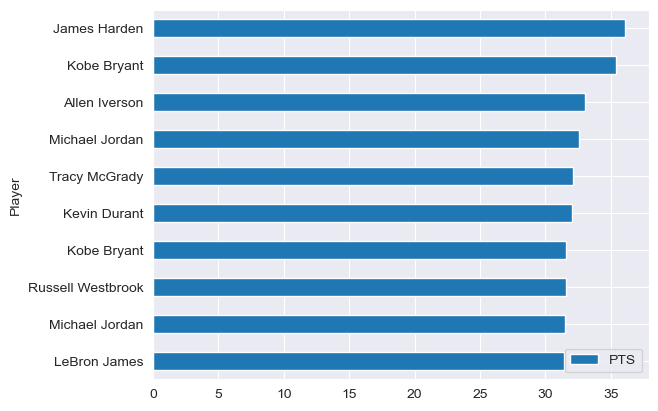

In [27]:
highest_scoring.plot.barh('Player', 'PTS').invert_yaxis()

In [37]:
highest_scorer = stats.groupby(by='Year').apply(lambda x: x.sort_values("PTS", ascending=False).head(1))
highest_scorer

,,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
Year,,,,,,,,,,,,,,,,,,,,,,
1991,8460,Michael Jordan,SG,27.0,82.0,82.0,37.0,12.1,22.4,0.539,0.4,...,960.0,0.928,Chicago Bulls,61.0,21.0,0.744,0.0,110.0,101.0,8.57
1992,8472,Michael Jordan,SG,28.0,80.0,80.0,38.8,11.8,22.7,0.519,0.3,...,960.0,0.938,Chicago Bulls,67.0,15.0,0.817,0.0,109.9,99.5,10.07
1993,8483,Michael Jordan,SG,29.0,78.0,78.0,39.3,12.7,25.7,0.495,1.0,...,980.0,0.577,Chicago Bulls,57.0,25.0,0.695,0.0,105.2,98.9,6.19
1994,7422,David Robinson,C,28.0,80.0,80.0,40.5,10.5,20.7,0.507,0.1,...,1010.0,0.723,San Antonio Spurs,55.0,27.0,0.671,3.0,100.0,94.8,5.05
1995,6215,Shaquille O'Neal,C,22.0,79.0,79.0,37.0,11.8,20.2,0.583,0.0,...,1050.0,0.576,Orlando Magic,57.0,25.0,0.695,0.0,110.9,103.8,6.44
1996,9093,Michael Jordan,SG,32.0,82.0,82.0,37.7,11.2,22.6,0.495,1.4,...,1130.0,0.986,Chicago Bulls,72.0,10.0,0.878,0.0,105.2,92.9,11.80
1997,9107,Michael Jordan,SG,33.0,82.0,82.0,37.9,11.2,23.1,0.486,1.4,...,1150.0,0.832,Chicago Bulls,69.0,13.0,0.841,0.0,103.1,92.3,10.70
1998,9120,Michael Jordan,SG,34.0,82.0,82.0,38.8,10.7,23.1,0.465,0.4,...,1160.0,0.934,Chicago Bulls,62.0,20.0,0.756,0.0,96.7,89.6,7.24
1999,744,Allen Iverson,SG,23.0,48.0,48.0,41.5,9.1,22.0,0.412,1.2,...,1180.0,0.270,Philadelphia 76ers,28.0,22.0,0.560,5.0,89.7,87.6,2.56


<Axes: xlabel='Year'>

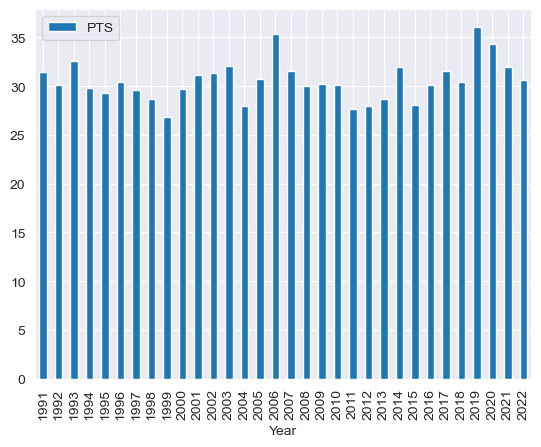

In [38]:
highest_scorer.plot.bar("Year", "PTS")

In [ ]:
stats.groupby("Year").apply(lambda x: x.shape[0])

In [39]:
stats.corr()['Share']

/var/folders/t4/x7zw1vdd2gx4d5lg3pnpdnwm0000gn/T/ipykernel_82098/4153898996.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats.corr()['Share']


Age        0.020769
G          0.091258
GS         0.170410
MP         0.165433
FG         0.283462
FGA        0.255496
FG%        0.066075
3P         0.096689
3PA        0.097249
3P%        0.014742
2P         0.283740
2PA        0.258885
2P%        0.062212
eFG%       0.058949
FT         0.326564
FTA        0.331554
FT%        0.039498
ORB        0.104581
DRB        0.222933
TRB        0.194577
AST        0.206765
STL        0.178493
BLK        0.158310
TOV        0.240763
PF         0.073782
PTS        0.295847
Year      -0.007579
Pts Won    0.994980
Pts Max    0.521228
Share      1.000000
W          0.126781
L         -0.126102
W/L%       0.130788
GB        -0.105901
PS/G       0.046658
PA/G      -0.039305
SRS        0.125430
Name: Share, dtype: float64

/var/folders/t4/x7zw1vdd2gx4d5lg3pnpdnwm0000gn/T/ipykernel_82098/198269374.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats.corr()['Share'].plot.bar()


<Axes: >

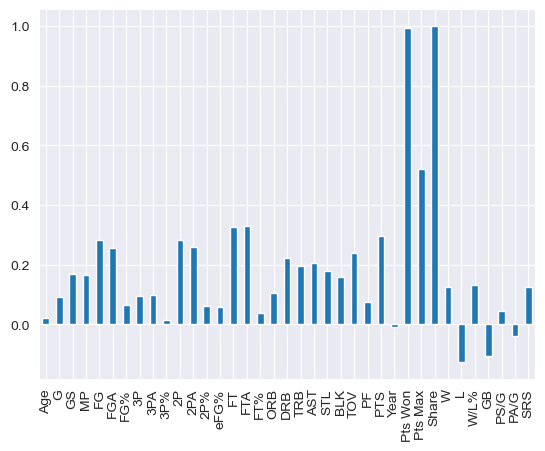

In [41]:
stats.corr()['Share'].plot.bar()